# **ASL Sign Language Detection**

## **Importing libraries and Data**



**Importing all the necessary libraries**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Rescaling
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

 **Training and validation directories for ASL Sign Language data.**










> SOURCE OF DATA = Collected by ourself using OPENCV library



In [2]:
data_train_path = '/content/drive/MyDrive/Colab Notebooks/ASL_Sign_Language_Data(256x256)_splitdata/train'
data_val_path = '/content/drive/MyDrive/Colab Notebooks/ASL_Sign_Language_Data(256x256)_splitdata/val'

 **Defines image dimensions and number of classes for image classification tasks.**

In [3]:
img_width = 256
img_height = 256
num_classes=26

## **Data Preprocessing**

> **This function image_dataset_from_directory loads the dataset in data_train and returns a dataset from images stored in a directory, with specified image dimensions and batch size, and optional shuffling of data.**

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
)

NotFoundError: Could not find directory /content/drive/MyDrive/Colab Notebooks/ASL_Sign_Language_Data(256x256)_splitdata/train



> **Get the 26 different class names from `data_train`.**



In [ ]:
data_cat = data_train.class_names



> **This function `image_dataset_from_directory` loads the dataset in data_val and returns a dataset from images stored in a directory, with specified image dimensions and batch size, and optional shuffling of data.**



In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
)

Found 104 files belonging to 26 classes.




> **This code visualizes a sample of images from the training dataset.**



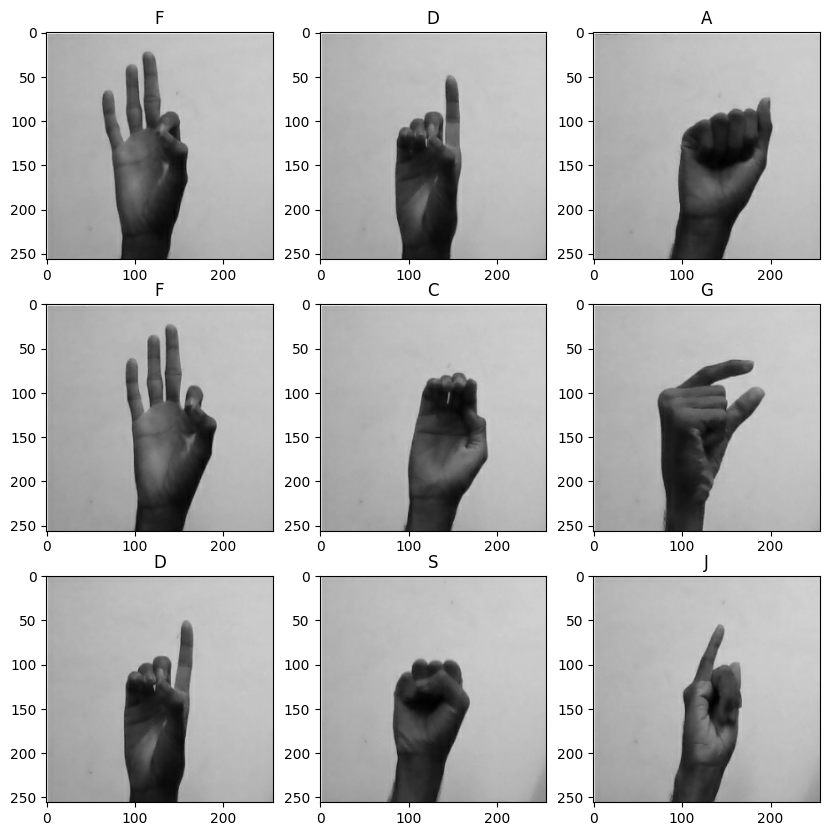

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])



> **Loop through the training dataset to inspect image shapes and labels.**



In [ ]:
for images, labels in data_train:
    print("Images shape:", images.shape)
    print("Labels:", labels)
    # You can also print out the actual image data if needed
    # print(images)
    break

Images shape: (32, 256, 256, 3)
Labels: tf.Tensor(
[ 4 10  7  0  6 23 15  5  4 11 21  7 17 20  1  9  2 19  9  4 22  3 23  1
 12 23  1 12 24 11 24  7], shape=(32,), dtype=int32)




> **Retrieve and display basic information about the training dataset, including image shapes, labels, and pixel values for the first image.**



In [ ]:
for images, labels in data_train:
    print("Images shape:", images.shape)
    print("Labels:", labels)
    print("Pixel values of the first image:")
    print(images[0])
    break

Images shape: (32, 256, 256, 3)
Labels: tf.Tensor(
[12  9 15  0 14 25  4  6  8 11  0 20 18 19 25 12  9 11 16 10  1 16  4 20
 10 24  6 25  0 18 13 13], shape=(32,), dtype=int32)
Pixel values of the first image:
tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [253. 253. 253.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [234. 234. 234.]
  [185. 185. 185.]
  ...
  [211. 211. 211.]
  [210. 210. 210.]
  [210. 210. 210.]]

 ...

 [[255. 255. 255.]
  [230. 230. 230.]
  [157. 157. 157.]
  ...
  [148. 148. 148.]
  [147. 147. 147.]
  [147. 147. 147.]]

 [[255. 255. 255.]
  [230. 230. 230.]
  [156. 156. 156.]
  ...
  [148. 148. 148.]
  [147. 147. 147.]
  [146. 146. 146.]]

 [[255. 255. 255.]
  [230. 230. 230.]
  [156. 156. 156.]
  ...
  [148. 148. 148.]
  [147. 147. 147.]
  [146. 146. 146.]]], shape=(256, 256, 3), dtype=float32)



Normalization of image pixel values is an important preprocessing step in machine learning, particularly for tasks involving neural networks like deep learning. Here's why we perform normalization:


*   Consistent Scale
*   Stability of Training
*   Gradient Descent








> **Normalize pixel values of training and validation datasets to the range [0, 1].**



In [ ]:
data_train_normalized = data_train.map(lambda x, y: (x / 255.0, y))
data_val_normalized = data_val.map(lambda x, y: (x / 255.0, y))



> **Display the pixel values of the first image from a normalized batch in TensorFlow.**



In [ ]:
# Get one batch of normalized images and labels
for images_normalized, labels in data_train_normalized.take(1):  # Take one batch
    # Extract the first normalized image
    image_normalized = images_normalized[0]

    # Print pixel values of the first image after normalization
    print("\nPixel values of the first image after normalization:")
    print(image_normalized.numpy())


Pixel values of the first image after normalization:
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.9137255  0.9137255  0.9137255 ]
  [0.7176471  0.7176471  0.7176471 ]
  ...
  [0.8156863  0.8156863  0.8156863 ]
  [0.81960785 0.81960785 0.81960785]
  [0.81960785 0.81960785 0.81960785]]

 ...

 [[1.         1.         1.        ]
  [0.90588236 0.90588236 0.90588236]
  [0.60784316 0.60784316 0.60784316]
  ...
  [0.5686275  0.5686275  0.5686275 ]
  [0.5686275  0.5686275  0.5686275 ]
  [0.5686275  0.5686275  0.5686275 ]]

 [[1.         1.    



> **Print the minimum and maximum pixel values of the first image after normalization.**



In [ ]:
for images_normalized, labels in data_train_normalized.take(1):  # Take one batch
    # Extract the first normalized image
    image_normalized = images_normalized[0]

    # Print minimum and maximum pixel values after normalization
    print("Minimum pixel value after normalization:", tf.reduce_min(image_normalized).numpy())
    print("Maximum pixel value after normalization:", tf.reduce_max(image_normalized).numpy())

Minimum pixel value after normalization: 0.003921569
Maximum pixel value after normalization: 1.0




> **Visualize the first image from each of the first four batches of the normalized training dataset using matplotlib subplots.**



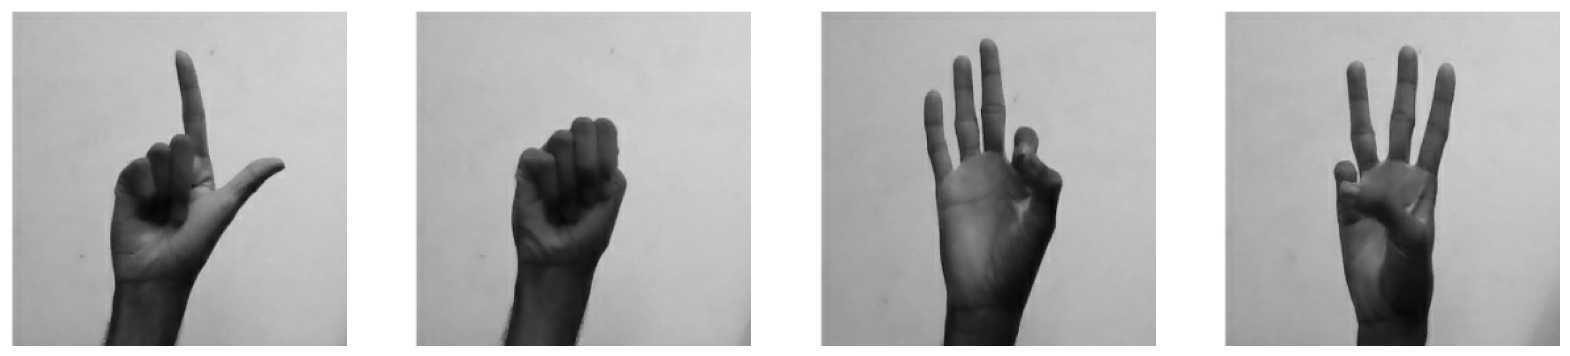

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate through each batch and plot the first image from each batch
for i, (images_normalized, labels) in enumerate(data_train_normalized.take(4)):
    # Display the first image from the batch
    ax[i].imshow(images_normalized[0].numpy())
    ax[i].axis("off")

plt.show()

## **Convolutional Neural Network (CNN) Architecture for Image Classification**

*   Sequential model initialized for image classification.
*   Includes convolutional layers with ReLU activation for feature extraction.
*   Max pooling layers for downsampling and reducing spatial dimensions.
*   Flattens output for dense layers.
*   Dense layers for classification with ReLU activation.
*   Final dense layer with softmax activation for output probabilities.

In [ ]:
model = Sequential()

# model.add(Rescaling(1./255, input_shape=(256, 256, 3)))

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

# model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))

# model.add(Dense(256,activation='relu'))

model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

## **Compile model for training.**

> **Adam is an optimization algorithm used in training deep learning models, adjusting learning rates adaptively based on the average of past gradients and their squares.**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



> **Train the model using normalized training data (`data_train_normalized`) and validation data (`data_val_normalized`) for a specified number of epochs (`epochs_size`).**



In [ ]:
epochs_size=15
history = model.fit(
    data_train_normalized,
    validation_data=data_val_normalized,
    epochs=epochs_size,
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 3s 92ms/step - loss: 3.3309 - accuracy: 0.1667 - val_loss: 3.0186 - val_accuracy: 0.6058
Epoch 2/15
10/10 [==============================] - 2s 120ms/step - loss: 2.5245 - accuracy: 0.5545 - val_loss: 1.6354 - val_accuracy: 0.6635
Epoch 3/15
10/10 [==============================] - 2s 96ms/step - loss: 0.8918 - accuracy: 0.8301 - val_loss: 0.8038 - val_accuracy: 0.7885
Epoch 4/15
10/10 [==============================] - 1s 77ms/step - loss: 0.3140 - accuracy: 0.9167 - val_loss: 0.4270 - val_accuracy: 0.8750
Epoch 5/15
10/10 [==============================] - 1s 76ms/step - loss: 0.0972 - accuracy: 0.9744 - val_loss: 0.1899 - val_accuracy: 0.9519
Epoch 6/15
10/10 [==============================] - 2s 111ms/step - loss: 0.0336 - accuracy: 0.9936 - val_loss: 0.1612 - val_accuracy: 0.9519
Epoch 7/15
10/10 [==============================] - 2s 112ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9712
Epoch 8/15
10/10 [===

## **Model Evaluation**



> **Evaluate the trained model using normalized validation and training datasets to assess performance metrics such as loss and accuracy.**



In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(data_val_normalized)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)
print('\n')
loss, accuracy = model.evaluate(data_train_normalized)
print("Training Loss:", loss)
print("Training Accuracy:", accuracy)

4/4 [==============================] - 0s 19ms/step - loss: 0.0981 - accuracy: 0.9808
Validation Loss: 0.09808303415775299
Validation Accuracy: 0.9807692170143127


10/10 [==============================] - 1s 26ms/step - loss: 1.5073e-04 - accuracy: 1.0000
Training Loss: 0.00015072680253069848
Training Accuracy: 1.0




> **Visualize the training and validation accuracy over epochs using matplotlib, with a red line for training accuracy (`data_train_normalized`) and a blue line for validation accuracy (`data_val_normalized`).**



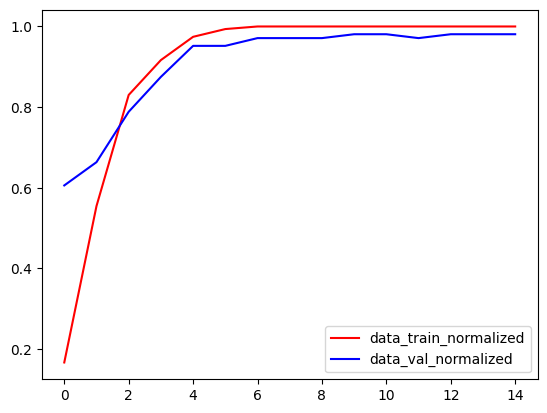

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='data_train_normalized')
plt.plot(history.history['val_accuracy'], color='blue', label='data_val_normalized')
plt.legend()
plt.show()



> **Plot the training and validation loss over epochs using matplotlib, with a red line representing training loss (`data_train_normalized`) and a blue line representing validation loss (`data_val_normalized`).**



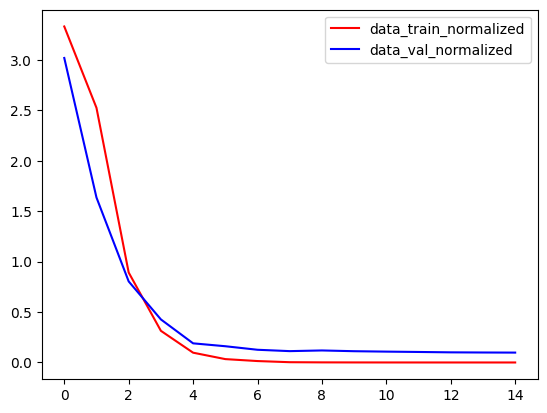

In [ ]:
plt.plot(history.history['loss'], color='red', label='data_train_normalized')
plt.plot(history.history['val_loss'], color='blue', label='data_val_normalized')
plt.legend()
plt.show()



> **Make predictions on the validation dataset using the trained model and calculate precision, recall, and F1 score metrics.**



In [ ]:
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to make predictions
for images, labels in data_val_normalized:
    predictions = model.predict(images)  # Make predictions
    predicted_labels.extend(tf.argmax(predictions, axis=1))  # Convert predictions to labels
    true_labels.extend(labels)  # Store true labels

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/1 [==============================] - 0s 114ms/step
Precision: 0.9846153846153847
Recall: 0.9807692307692307
F1 Score: 0.9804639804639805




> **Prepare to evaluate the model's predictions on the validation dataset by storing true labels and predicted labels.**



In [ ]:
# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to make predictions
for images, labels in data_val_normalized:
    # Store true labels
    true_labels.extend(labels.numpy())

    # Make predictions
    predictions = model.predict(images)
    # Convert probabilities to class indices
    predicted_labels.extend(tf.argmax(predictions, axis=1).numpy())

1/1 [==============================] - 0s 20ms/step




> **Generate and print a classification report based on the true and predicted labels, providing detailed metrics such as precision, recall, and F1-score for each class in the dataset.**



In [ ]:
# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=data_cat)

# Print classification report
print(class_report)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       1.00      1.00      1.00         4
           C       1.00      0.75      0.86         4
           D       1.00      1.00      1.00         4
           E       0.80      1.00      0.89         4
           F       1.00      0.75      0.86         4
           G       1.00      1.00      1.00         4
           H       1.00      1.00      1.00         4
           I       1.00      1.00      1.00         4
           J       1.00      1.00      1.00         4
           K       1.00      1.00      1.00         4
           L       1.00      1.00      1.00         4
           M       1.00      1.00      1.00         4
           N       1.00      1.00      1.00         4
           O       1.00      1.00      1.00         4
           P       1.00      1.00      1.00         4
           Q       1.00      1.00      1.00         4
           R       1.00    



> **Compute and visualize the confusion matrix based on the true and predicted labels using seaborn's heatmap function.**



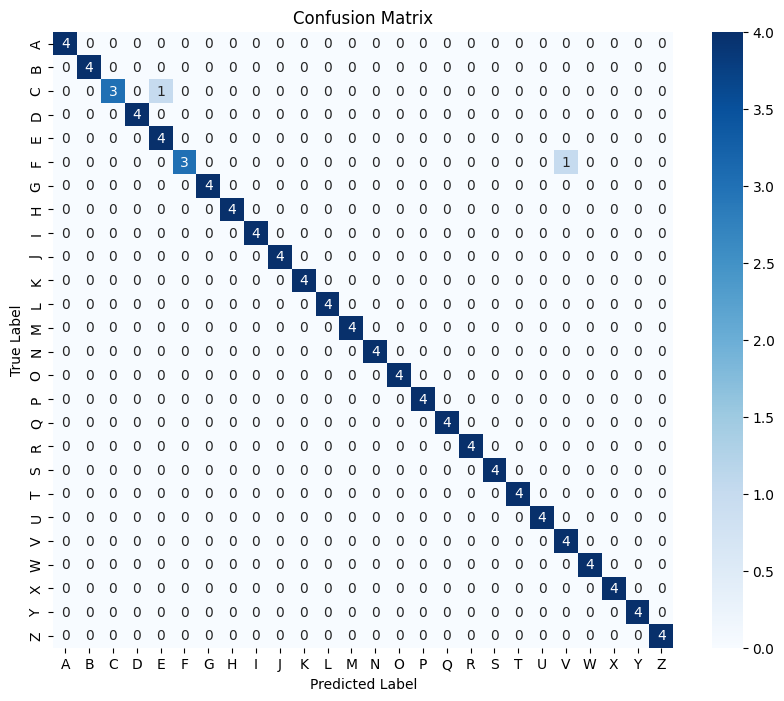

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Predicted Output**



> **Load and preprocess an image for inference with a pre-trained model. Make predictions on the image and display the predicted class along with the image.**



1/1 [==============================] - 0s 127ms/step


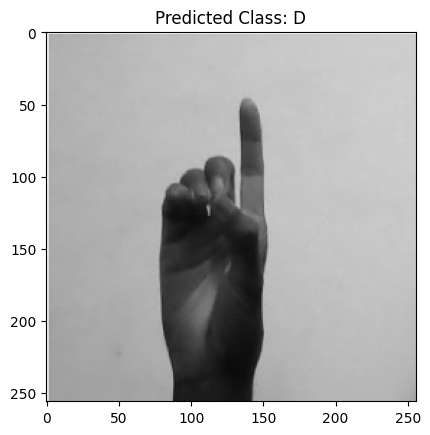

Predicted Class: D


In [ ]:
# Load and preprocess the image
image_path = '/content/drive/MyDrive/Colab Notebooks/ASL_Sign_Language_Data(256x256)_splitdata/test/D.jpg'
img_height = 256
img_width = 256

image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array_normalized = image_array / 255.0  # Normalize the image

# Expand dimensions to match expected input shape (batch_size, height, width, channels)
image_input = tf.expand_dims(image_array_normalized, axis=0)

# Load the model
model = tf.keras.models.load_model('/content/my_model.h5')  # Replace with the path to your trained model

# Load the class names
data_cat = ['A','B','C','D']  # Replace [...] with your list of class names

# Make predictions
predictions = model.predict(image_input)
predicted_class_index = tf.argmax(predictions, axis=1)[0].numpy()
predicted_class = data_cat[predicted_class_index]

# Visualize the prediction and print the predicted class label
plt.imshow(image)
plt.title('Predicted Class: ' + predicted_class)
plt.axis()
plt.show()

# Print the predicted class label
print("Predicted Class:", predicted_class)



> **Save the trained model to a file and download it using Google Colab's file download feature.**



In [ ]:
# Save the model to a file
model.save('/content/my_model.h5')

# Download the model file
from google.colab import files
files.download('/content/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **OBSERVATION**



*   The training process consisted of 15 epochs, where the model's performance steadily improved over time.
*   Both training accuracy and validation accuracy increased consistently with each epoch, reaching high values by the final epoch.
*   There are signs of overfitting towards the later epochs, as training accuracy approaches 100% while validation accuracy plateaus around 98%.
*   The final validation accuracy of approximately 98.08% indicates strong performance in classifying ASL letter images.





# **Report on Image Classification Model**


---





### **Introduction**



> This report outlines the development and evaluation of an image classification model using TensorFlow and Keras. The goal of the project was to train a deep learning model to classify images of American Sign Language (ASL) letters.



### **Data Preparation**


> * Dataset: The dataset consisted of ASL letter images split into training and validation sets.
* Data Loading: Images were loaded using tf.keras.utils.image_dataset_from_directory and resized to a standard size.
* Data Normalization: Pixel values were normalized to a range of [0, 1] to facilitate model training.



### **Model Architecture**


> * Model Type: A convolutional neural network (CNN) was used for image classification.
* Architecture: The model architecture included multiple convolutional and pooling layers followed by fully connected layers.
* Activation Functions: ReLU activation was used for intermediate layers, and softmax activation was used for the output layer.



###**Model Training**
> * Training Process: The model was trained using the normalized training dataset over multiple epochs.
* Validation: Model performance was monitored using a separate validation dataset during training.
* Optimizer and Loss Function: Adam optimizer was used with categorical cross-entropy loss.


### **Model Evaluation**


> * Metrics: The model was evaluated based on accuracy, loss, precision, recall, and F1-score.
* Visualization: Training history (loss and accuracy) was visualized using matplotlib.



### **Inference and Deployment**


> * Single Image Prediction: Inference was demonstrated on individual images, showing predicted class labels.
* Model Saving: The trained model was saved to a file (my_model.h5) for future use.
* Model Deployment: The saved model file was downloadable for deployment in real-world applications.



### **Results**


> * Performance: The model achieved a high accuracy on the validation dataset.
* Confusion Matrix: The confusion matrix provided insights into the model's classification performance across different classes.



### **Conclusion**


> In conclusion, the developed image classification model successfully learned to recognize ASL letter images with high accuracy. Further improvements could involve model optimization, data augmentation, and deployment for practical use.

